In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar y aplanar
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)  # (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1)    # (10000, 784)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [7]:
model = LogisticRegression(
    max_iter=5,           # número de iteraciones
    solver="saga",          # optimizador eficiente para datasets grandes
    multi_class="multinomial",
    n_jobs=-1               # usar todos los cores disponibles
)

In [8]:
print("Entrenando Logistic Regression...")
model.fit(x_train, y_train)

Entrenando Logistic Regression...


/home/minicaos/demo-review/ver-keras/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/minicaos/demo-review/ver-keras/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,5
,multi_class,'multinomial'


In [9]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy en test:", acc)

Accuracy en test: 0.8465


In [10]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
i = 0
img = x_test[i].reshape(1, -1)
label = y_test[i]

pred = model.predict(img)[0]
pred_class = classes[pred]
actual_class = classes[label]

print(f'Predicted: "{pred_class}", Actual: "{actual_class}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


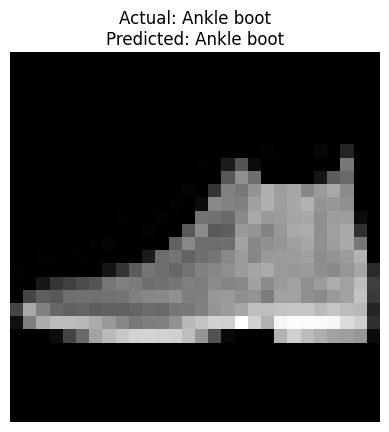

In [14]:
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title(f'Actual: {actual_class}\nPredicted: {pred_class}')
plt.axis("off")
plt.show()